<a href="https://colab.research.google.com/github/AnkurPegu404/AnkurPegu404/blob/main/Airbnb_Bookings_Analysis_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract
Hi I am Ankur Pegu. Project Airbnb Booking Analysis is submitted to AlmaBetter as part of the capstone project.

#<b>Airbnb, a prominent player in the sharing economy, has revolutionized the travel industry by connecting travelers with unique accommodations offered by local hosts. This platform enables peer-to-peer lodging, allowing guests to book rooms, apartments, or entire homes, often at more affordable rates than traditional hotels. By leveraging technology and fostering a sense of community, Airbnb has significantly impacted the tourism landscape, challenging conventional hospitality models and empowering individuals to monetize their properties. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as :
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Which room type is prefered in most popular neighbourhood?

#* Data Importing and Cleaning

In [ ]:
# Importing necessary libraries for analysing the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing dataset/content/drive/MyDrive/Ankur/Airbnb NYC 2019.csv
airbnb_data = pd.read_csv('/content/drive/MyDrive/Ankur/Module 2 Numerical programming in Python/Airbnb NYC 2019.csv')
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Understanding the data
# Checking the shape of datset
print(f'The shape of Airbnb Dataset is {airbnb_data.shape}')

The shape of Airbnb Dataset is (48895, 16)


In [ ]:
# Checking the feature names
print(f' The names of the features present in the dataset are: ')
list(airbnb_data.columns)

 The names of the features present in the dataset are: 


['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
#Checking for categorical columns
cat_cols = airbnb_data.select_dtypes(include = 'object').columns
print(f' The following are the categorical features in the dataset: {list(cat_cols)}')

 The following are the categorical features in the dataset: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


In [ ]:
# Checking for numeric/ non categorical columns
num_cols = airbnb_data.select_dtypes(exclude = 'object').columns
print(' The following are the non categorical features in the dataset:')
list(num_cols)

 The following are the non categorical features in the dataset:


['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
# Checking first 5 rows of the data
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Checking the last 5 rows of the data
airbnb_data.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
# Checking the information of the dataset
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Checking for the null values
print(f'The missing values before cleaning the data are:')
airbnb_data.isnull().sum()

The missing values before cleaning the data are:


,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


The features like last_reviews and reviews_per_month have most null values in the dataset.

In [ ]:
# Filling missing values
airbnb_data['name'].fillna('Absent', inplace = True)
airbnb_data['host_name'].fillna('Absent', inplace =  True)

In [ ]:
# Dropping the unncessary columns.
airbnb_data_new = airbnb_data.drop(['last_review','reviews_per_month'], axis =1)
airbnb_data_new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [ ]:
# Checking for null values in the new dataset
print(f'The number of missing values after cleaning the data are:')
airbnb_data_new.isnull().sum()

The number of missing values after cleaning the data are:


,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


## Exploring the data and answer the questions at the start of the notebook.
## *  What can we learn about different hosts and areas?


In [ ]:
# Let's see who has the most listings and in which neighbourhood.
host_areas = airbnb_data_new.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
top_hosts = host_areas.sort_values(by = ['calculated_host_listings_count'], ascending = False).head(9)
top_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1838,Blueground,Manhattan,232
1837,Blueground,Brooklyn,232
7279,Kara,Manhattan,121
7482,Kazuya,Brooklyn,103
7484,Kazuya,Queens,103
7483,Kazuya,Manhattan,103
13220,Sonder,Manhattan,96
6544,Jeremy & Laura,Manhattan,96


### Observation :From the above result, we can conclude that the name of the host with the most listings is **Sonder(NYC)** who has **327 listings** in **Manhattan**

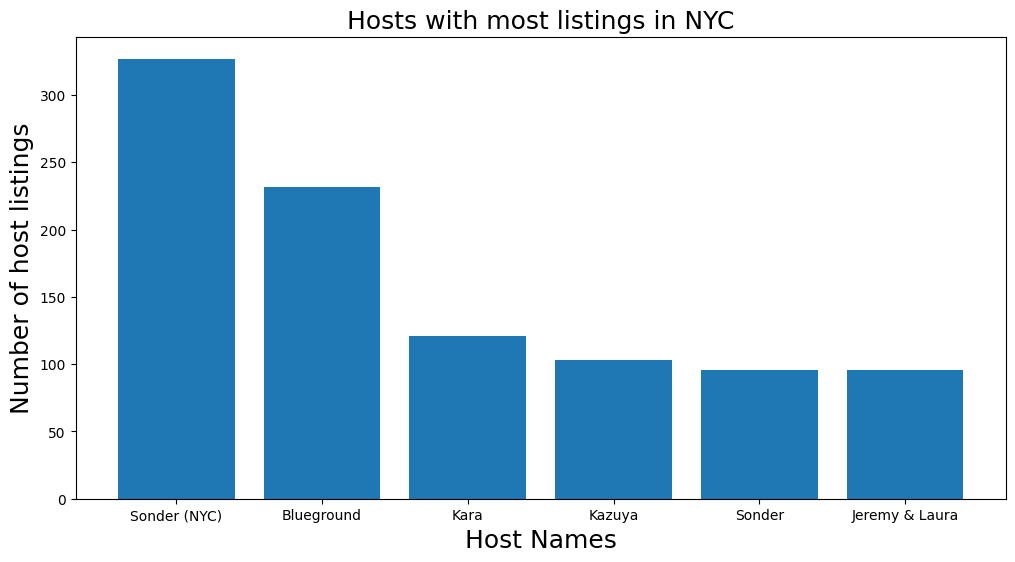

In [ ]:
# Visualizing the hosts with most listings.
plt.rcParams['figure.figsize'] = (12,6)
host_name = top_hosts['host_name']
host_lisitng = top_hosts['calculated_host_listings_count']
plt.bar(host_name,host_lisitng)
plt.title('Hosts with most listings in NYC',{'fontsize':18})
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Number of host listings',{'fontsize':18})
plt.show()

In [ ]:
# Number of Airbnb listed in each neighbourhood
data =airbnb_data_new.groupby(['neighbourhood_group'])['id'].count().reset_index().rename(columns = {'id':'count'}).sort_values(by='count', ascending = False)
data.head()

,neighbourhood_group,count
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


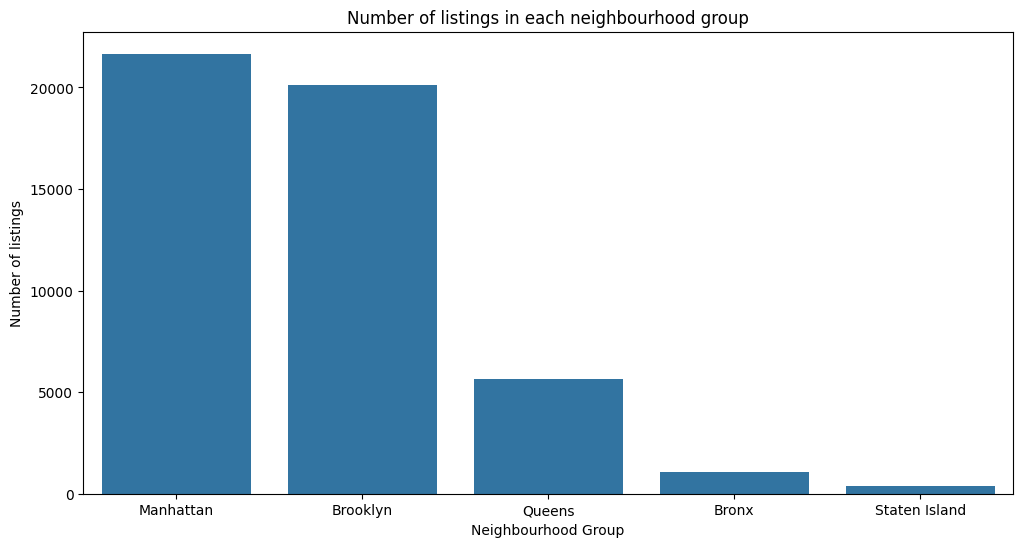

In [ ]:
# Visualizing the number of listings in each neighbourhood through bar plot
plt.rcParams['figure.figsize'] = (12,6)
ax = sns.barplot(x = data['neighbourhood_group'], y = data['count'], data = data)
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Number of listings')
ax.set_title('Number of listings in each neighbourhood group')
plt.show()

## * What can we learn from predictions? (ex: locations, prices, reviews, etc)


In [ ]:
# Finding which neighbourhood has got maximum number of reviews.
areas_reviews = airbnb_data_new.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False)
areas_reviews

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


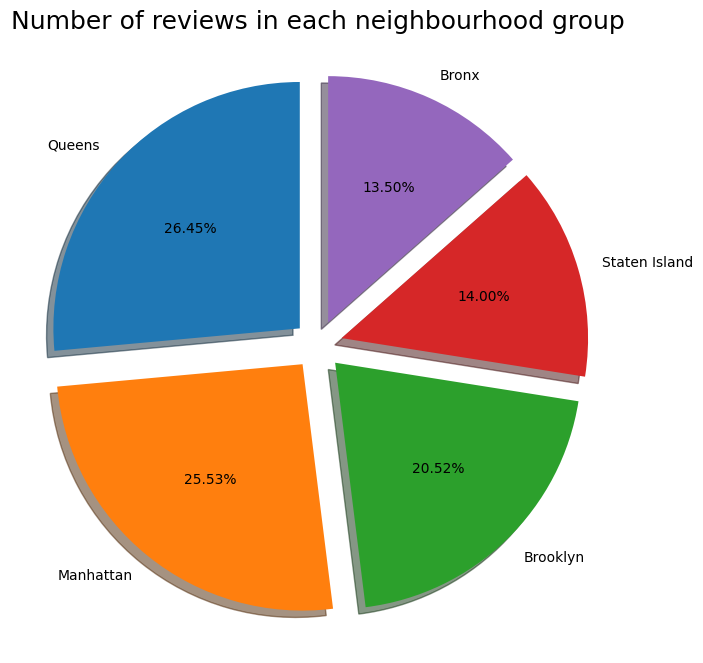

In [ ]:
# Visualising the number of reviews in each neighbourhood group through pie chart
plt.rcParams['figure.figsize'] = (13,8)
reviews = areas_reviews['number_of_reviews']
plt.pie(reviews, labels = areas_reviews['neighbourhood_group'], autopct ='%0.2f%%', startangle =90, explode = [0.1,0.1,0.1,0.1,0.1], shadow = True )
plt.title('Number of reviews in each neighbourhood group', {'fontsize': 18})
plt.show()

Observation : The share percentage of reviews for each neighbourhood group is depicted above. It can be stated that Queens, Manhattan have majority of reviews which implies that people are liking these neighbourhoods. Also from these neighbourhoods majority revenue is generated for the company.

In [ ]:
# Checking the descriptive statistics
airbnb_data_new.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


###The summary statistics shows us that the average price is 152.72, the average minimum nights stay is 7.03 nights, and the average number of reviews is 23.27 per listing. We also learn that a host has an average of 7.14 places listed and availability averages 112.78 vacant days per year.

###Most importantly, the min price is showing as zero and the max price as 10,000. Something isn't right with the data, so need to look into this issue and check for outliers.

In [ ]:
# Checking for outliers
airbnb_data_new.agg({'price':['mean','median','max','count']})

,price
mean,152.720687
median,106.000000
max,10000.000000
count,48895.000000


###The minimum value is set as zero, which does not make any sense since there are no free rooms on Airbnb - and the maximum value is set 10,000 - which just seems too high. Notice how the mean is considerably higher than the median. This is an indication that the data is skewed.

###Let's use a boxplot to get a better understanding of price distribution:

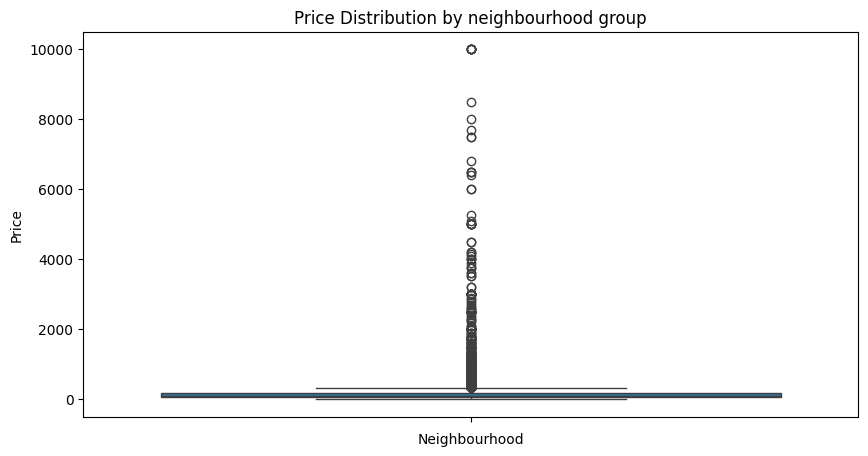

In [ ]:
#Plotting the boxplot of the price data.
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='price', data=airbnb_data_new).set_title('Price Distribution by neighbourhood group')
sns.set_theme(style='white')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.show()

As expected there are outliers present in the data. In order to fix this, we will be using the quantile based flooring and capping.
First, let's print the 10th and 90th percentile of the price column.

In [ ]:
# low quantile
q_low = airbnb_data_new['price'].quantile(0.10)
q_low

49.0

In [ ]:
#high quantile
q_high = airbnb_data_new['price'].quantile(0.9)
q_high

269.0

####Looks like the 10th percentile is 49USD and the 90th percentile is 269USD. Since we are dealing with Airbnb listings, it is not uncommon for a few places to be much more expensive than others, especially luxurious ones.

####Given that we are going to perform calculations in our data and the mean can be skewed by outliers, let's go ahead and implement the above technique by removing the values that don't apply to the specified range – set between 49USD and 269USD.

In [ ]:
#removing the values below 10th percentile and above 90th percentile
airbnb_data_new = airbnb_data_new.drop(airbnb_data_new[airbnb_data_new['price']<q_low].index)
airbnb_data_new = airbnb_data_new.drop(airbnb_data_new[airbnb_data_new['price']>q_high].index)

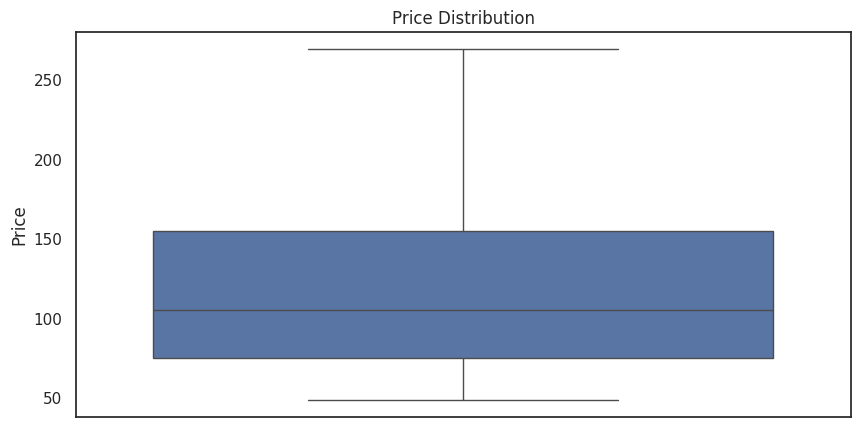

In [ ]:
#Lets create a new boxplot and check the result.
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='price', data=airbnb_data_new).set_title('Price Distribution')
sns.set_theme(style='white')
plt.ylabel('Price')
plt.show()

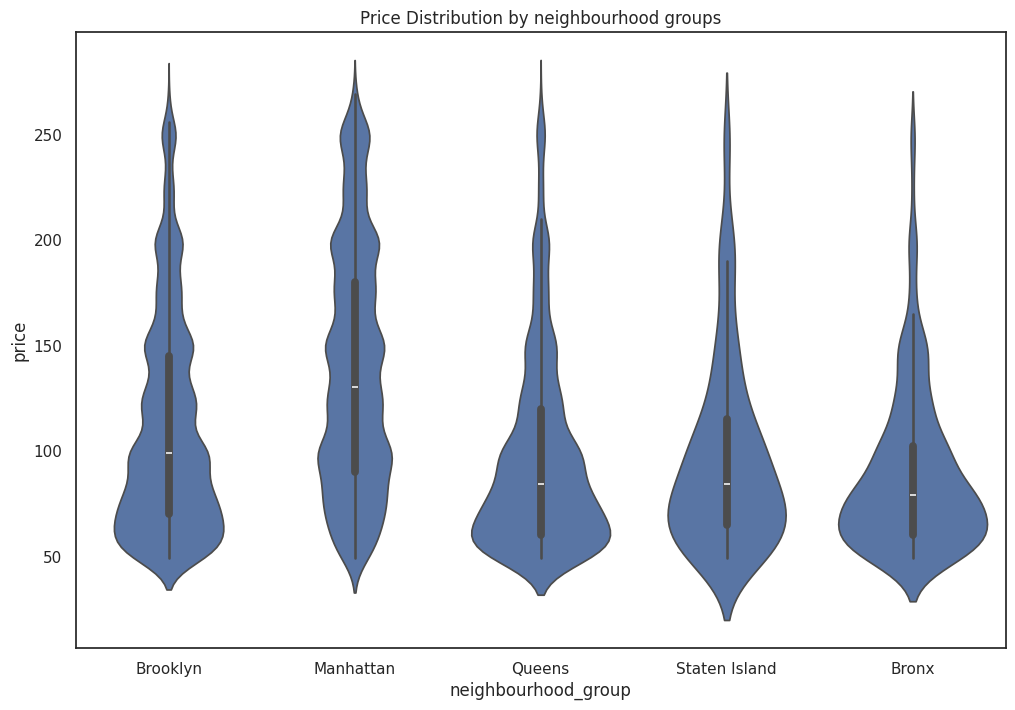

In [ ]:
# Now lets see the price distribution by neighbourhood gropus
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="neighbourhood_group", y="price", data=airbnb_data_new).set_title('Price Distribution by neighbourhood groups')
plt.show()

###By looking at the violin plot, we can see that Manhattan has a higher price range and is the most expensive one. Brooklyn has the second-highest rental prices, while the Bronx appears as the most affordable one.


## * Which hosts are the busiest and why?


In [ ]:
#Busiest hosts would be those who have maximum number of reviews as people are booking frequently at those hosts.
busiest_hosts = airbnb_data_new.groupby(['host_name','host_id','room_type','neighbourhood_group'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,neighbourhood_group,number_of_reviews
14729,Jj,4734398,Private room,Manhattan,607
5194,Carol,2369681,Private room,Manhattan,540
3280,Asa,12949460,Entire home/apt,Brooklyn,488
31453,Wanda,792159,Private room,Brooklyn,480
18686,Linda,2680820,Private room,Queens,474
7176,Dani,42273,Entire home/apt,Brooklyn,467
2434,Angela,23591164,Private room,Queens,466
465,Agnes,277379,Private room,Manhattan,458
14973,John,2267153,Private room,Manhattan,451
8210,Dennis & Naoko,307962,Entire home/apt,Queens,441


<BarContainer object of 10 artists>

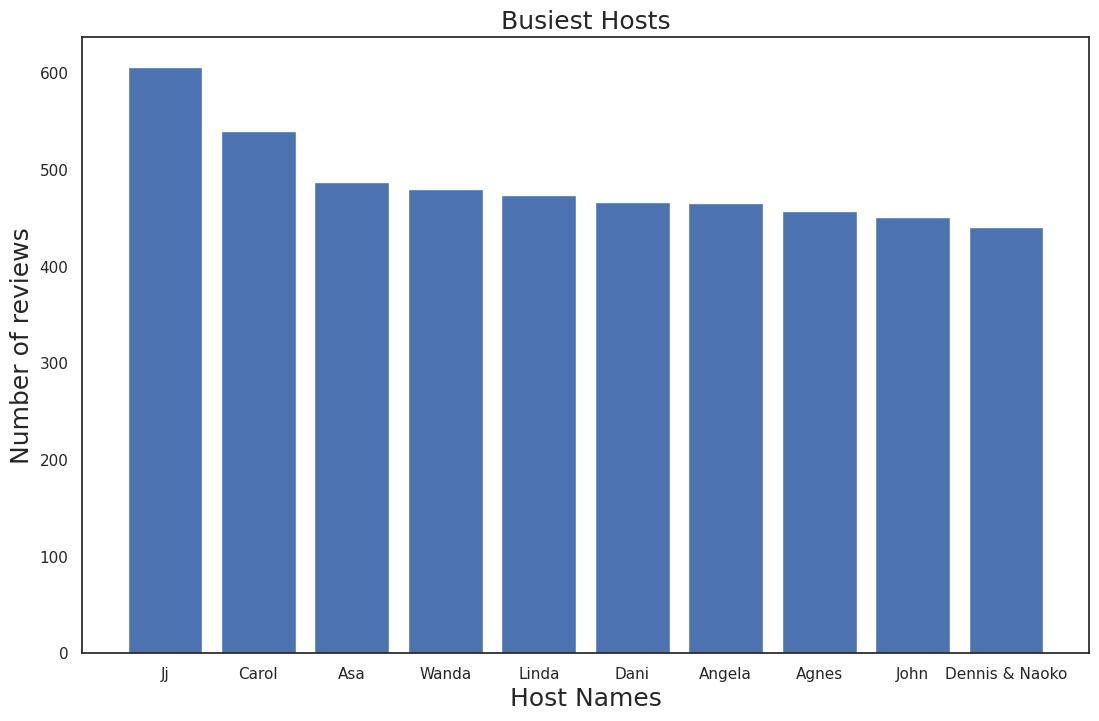

In [ ]:
# Visualising the busiest hosts data through bar plot.
host_name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']
plt.title('Busiest Hosts', {'fontsize':18})
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Number of reviews',{'fontsize':18})
plt.bar(host_name, reviews)

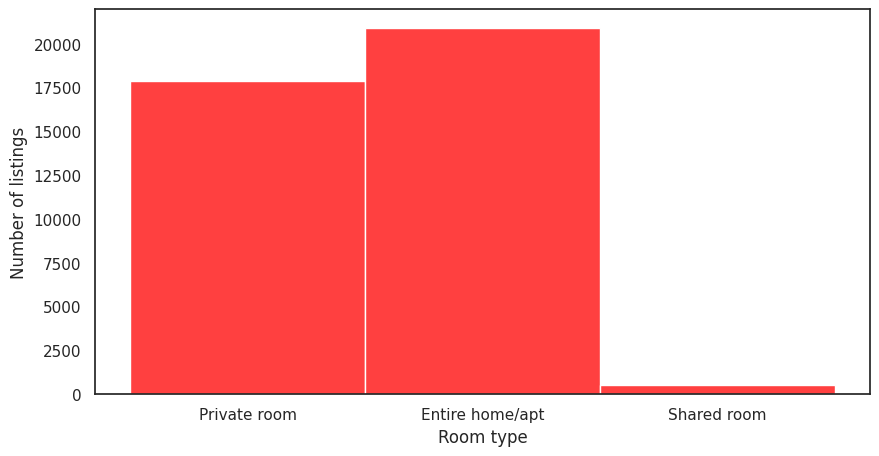

In [ ]:
# Plotting histogram for room types to look for which are most preferred room types.
plt.rcParams['figure.figsize'] = (10,5)
hp = sns.histplot(airbnb_data_new['room_type'], color= 'red')
hp.set_xlabel('Room type')
hp.set_ylabel('Number of listings')
plt.show()

In [ ]:
# Top 5 Busiest Hosts are:
# Ji
# Carol
# Asa
# Wanda
# Linda

#### The above mentioned hosts are busiest because they host Entire home/apt and private room which are the most preferred room types according to above histogram plot.

### * Which room type is prefered in most popular neighbourhood?

In [ ]:
# Lets find the top 10 neighbourhoods with most listings
df1 = airbnb_data_new.groupby(['neighbourhood'])['id'].count().nlargest(10)
df1

,id
neighbourhood,
Williamsburg,3415
Bedford-Stuyvesant,2963
Harlem,2311
Bushwick,1846
Upper West Side,1619
East Village,1590
Hell's Kitchen,1576
Upper East Side,1561
Crown Heights,1257


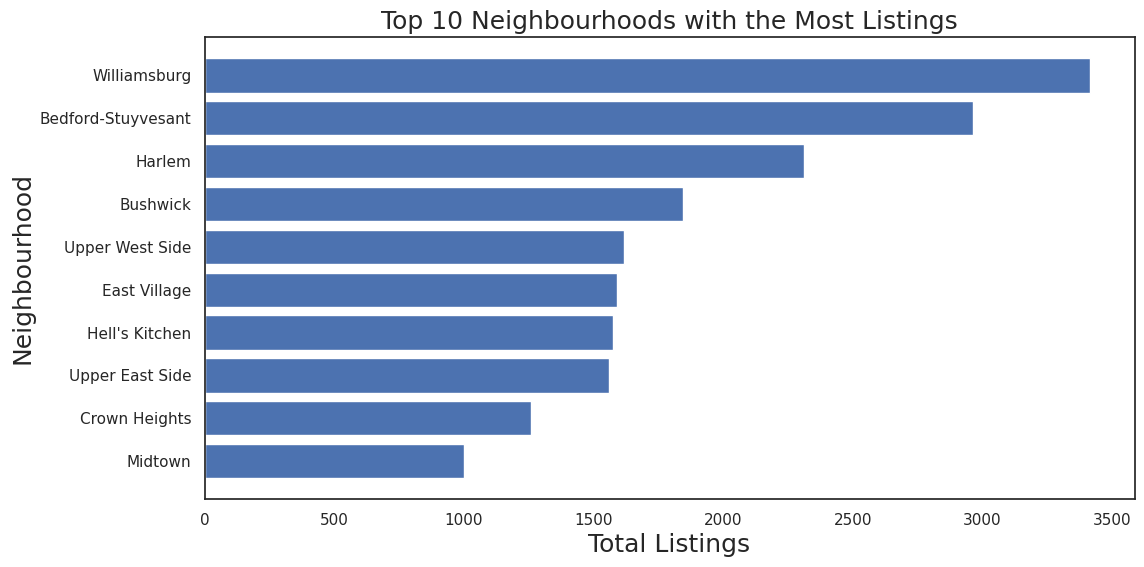

In [ ]:
# Visualizing the top 10 neighbourhood listings through bar plot
plt.figure(figsize=(12,6))
x = list(df1.index)
y = list(df1.values)
x.reverse()
y.reverse()

plt.title("Top 10 Neighbourhoods with the Most Listings", {'fontsize':18})
plt.ylabel("Neighbourhood", {'fontsize':18})
plt.xlabel("Total Listings", {'fontsize':18})

plt.barh(x, y)
plt.show()

###The neighborhoods with the most listings are in Manhattan and Brooklyn – which is understandable – given that tourists are more likely to stay in those areas. Williamsburg, in Brooklyn, appears first with 3,415 listings. In Manhattan, Harlem has the most listings, totaling 2,311 offers.

In [ ]:
airbnb_data_new.groupby(['neighbourhood_group','neighbourhood','room_type'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False).head(10)

,neighbourhood_group,neighbourhood,room_type,number_of_reviews
255,Manhattan,Harlem,Private room,607
270,Manhattan,Lower East Side,Private room,540
196,Brooklyn,Park Slope,Entire home/apt,488
132,Brooklyn,Bushwick,Private room,480
358,Queens,Flushing,Private room,474
212,Brooklyn,South Slope,Entire home/apt,467
348,Queens,East Elmhurst,Private room,466
241,Manhattan,East Village,Private room,451
318,Queens,Astoria,Entire home/apt,441
419,Queens,Springfield Gardens,Entire home/apt,434


####The most popular neighbourhood is Harlem which is situated in Manhattan and the room type prefered here is Private Room.

Key Findings:
1. Manhattan has most number of listings, followed by Brooklyn and Queens. Staten Island has least number of listings.
2. Manhattan and Brooklyn make up for 87% of listings available in NYC.
3. Brooklyn and Manhattan are most liked neighbourhood groups by people.
4. Queens has significantly less host listings than Manhattan. So, we should take enough steps to encourage host listings in Queens.
5. The maximum demand is for private rooms and enitre home/apartment. People are more interested in cheaper rentals.

## Conclusion:
###We can conclude from the analysis that Manhattan is the top neighbourhood group when it comes to the number of listings and highest rental prices. Given that Manhattan is a world-famous for its museums, stores, parks and theatres - and its substantial number of tourists throughout the year, hence the prices are much higher in this borough.

###The number 2 neighbourhood group is Brooklyn having significant number of listings and more affordable prices if compared to Manhattan.

###For other neighbourhood groups namely Queens, Bronx and Staten island there aren't as many listing options available, especially on Staten Island. Considering that those are residential areas, it is possible that many guests choose these locations to save up money or perhaps to visit family and friends who live in this area.

###For our data exploration purpose, it would have been nice to have couple of additional features like positive and negative reviews. Depending upon that we could have gauged the popularity of each neighbourhood.